In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans

In [52]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
from sklearn.utils import shuffle

In [56]:
df = pd.read_csv("trafficfile.csv")

In [58]:
df

,Title,Keyword,Keyword_ID,Position,Previous_position,Search_Volume,CPC,Traffic,Traffic(%),Traffic_Cost,Traffic_Cost(%),Competition,Number_of_Results,Keyword_Difficulty
0,AWS Certification Course,amazon web service certification,1,2,2,1300,1.74,16,0.08,27,0.04,0.34,318000000,97.0
1,AWS Certified Cloud Practioner | Special Offer...,aws practitioner certification,1,3,0,1000,1.50,9,0.04,13,0.02,0.41,29200000,78.0
2,AWS Certified Cloud Practioner | Today's offer...,best aws learning tutorial,1,5,5,720,0.00,3,0.01,0,0.00,0.00,45700000,47.0
3,AWS Solution Architect Course | Get AWS Associ...,aws solutions architect-associate,1,4,4,70,3.86,0,0.00,0,0.00,0.25,11000000,61.0
4,Become a Certified ScrumMaster | Today's Offer...,scrum master certification,10,3,3,18100,3.21,162,0.86,520,0.80,0.64,31900000,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,TOGAF® Certification Exam Cost | TOGAF® Free E...,togaf certification price,12,4,4,30,1.94,0,0.00,0,0.00,0.30,384000,24.0
195,TOGAF® Certification Price - TOGAF® Free Exam ...,togaf certification training,12,2,2,90,4.43,1,0.00,4,0.00,0.47,1050000,33.0
196,TOGAF® Enterprise Architecture | Enroll in TOG...,udacity enterprise architecture,12,4,4,260,0.00,1,0.00,0,0.00,0.00,131000,20.0
197,TOGAF® Enterprise Architecture | Enroll in TOG...,it architect certification program,12,4,4,110,3.68,0,0.00,0,0.00,0.22,41700000,31.0


In [60]:
df.head()

,Title,Keyword,Keyword_ID,Position,Previous_position,Search_Volume,CPC,Traffic,Traffic(%),Traffic_Cost,Traffic_Cost(%),Competition,Number_of_Results,Keyword_Difficulty
0,AWS Certification Course,amazon web service certification,1,2,2,1300,1.74,16,0.08,27,0.04,0.34,318000000,97.0
1,AWS Certified Cloud Practioner | Special Offer...,aws practitioner certification,1,3,0,1000,1.50,9,0.04,13,0.02,0.41,29200000,78.0
2,AWS Certified Cloud Practioner | Today's offer...,best aws learning tutorial,1,5,5,720,0.00,3,0.01,0,0.00,0.00,45700000,47.0
3,AWS Solution Architect Course | Get AWS Associ...,aws solutions architect-associate,1,4,4,70,3.86,0,0.00,0,0.00,0.25,11000000,61.0
4,Become a Certified ScrumMaster | Today's Offer...,scrum master certification,10,3,3,18100,3.21,162,0.86,520,0.80,0.64,31900000,74.0


In [62]:
df.tail()

,Title,Keyword,Keyword_ID,Position,Previous_position,Search_Volume,CPC,Traffic,Traffic(%),Traffic_Cost,Traffic_Cost(%),Competition,Number_of_Results,Keyword_Difficulty
194,TOGAF® Certification Exam Cost | TOGAF® Free E...,togaf certification price,12,4,4,30,1.94,0,0.00,0,0.00,0.30,384000,24.0
195,TOGAF® Certification Price - TOGAF® Free Exam ...,togaf certification training,12,2,2,90,4.43,1,0.00,4,0.00,0.47,1050000,33.0
196,TOGAF® Enterprise Architecture | Enroll in TOG...,udacity enterprise architecture,12,4,4,260,0.00,1,0.00,0,0.00,0.00,131000,20.0
197,TOGAF® Enterprise Architecture | Enroll in TOG...,it architect certification program,12,4,4,110,3.68,0,0.00,0,0.00,0.22,41700000,31.0
198,TOGAF® Enterprise Architecture | Master TOGAF®...,togaf training,12,1,1,210,3.85,9,0.04,34,0.05,0.38,4160000,43.0


In [64]:
df.shape

(199, 14)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               199 non-null    object 
 1   Keyword             199 non-null    object 
 2   Keyword_ID          199 non-null    int64  
 3   Position            199 non-null    int64  
 4   Previous_position   199 non-null    int64  
 5   Search_Volume       199 non-null    int64  
 6   CPC                 199 non-null    float64
 7   Traffic             199 non-null    int64  
 8   Traffic(%)          199 non-null    float64
 9   Traffic_Cost        199 non-null    int64  
 10  Traffic_Cost(%)     199 non-null    float64
 11  Competition         199 non-null    float64
 12  Number_of_Results   199 non-null    int64  
 13  Keyword_Difficulty  198 non-null    float64
dtypes: float64(5), int64(7), object(2)
memory usage: 21.9+ KB


In [68]:
df.describe()

,Keyword_ID,Position,Previous_position,Search_Volume,CPC,Traffic,Traffic(%),Traffic_Cost,Traffic_Cost(%),Competition,Number_of_Results,Keyword_Difficulty
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,1.990000e+02,198.000000
mean,8.095477,2.532663,2.391960,4711.608040,3.916985,93.829146,0.498945,325.819095,0.499347,0.381658,4.575325e+07,48.747475
std,2.879031,1.526761,1.559311,16003.015228,3.853916,446.718734,2.392012,1671.621365,2.578053,0.198629,1.462253e+08,16.954309
min,1.000000,1.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,8.000000
25%,6.000000,1.000000,1.000000,70.000000,2.310000,0.500000,0.000000,0.000000,0.000000,0.185000,2.750000e+06,37.000000
50%,8.000000,2.000000,2.000000,170.000000,3.210000,3.000000,0.010000,7.000000,0.010000,0.410000,5.570000e+06,47.500000
75%,11.000000,4.000000,4.000000,1600.000000,4.485000,20.000000,0.100000,48.000000,0.070000,0.520000,3.170000e+07,60.000000
max,12.000000,6.000000,6.000000,90500.000000,46.860000,4253.000000,22.770000,15991.000000,24.660000,0.950000,1.400000e+09,97.000000


In [70]:
data = df[["Competition","Position"]]

In [72]:
X = data
Y = df["Position"]

In [74]:
data.head()

,Competition,Position
0,0.34,2
1,0.41,3
2,0.00,5
3,0.25,4
4,0.64,3


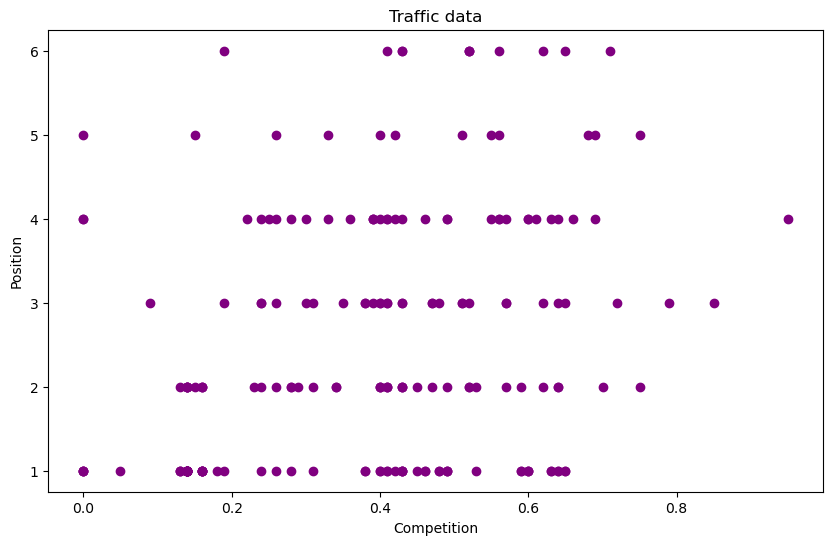

In [122]:
plt.figure(figsize=(10,6)) 
plt.scatter(df['Competition'],df['Position'], c = 'purple') 
plt.xlabel('Competition')
plt.ylabel('Position')
plt.title('Traffic data')
plt.show()

In [102]:
# create 2D array of these columns (Competition & Position) for further use
X = df.iloc[:, [11,3]].values
X[:5] 

array([[0.34, 2.  ],
       [0.41, 3.  ],
       [0.  , 5.  ],
       [0.25, 4.  ],
       [0.64, 3.  ]])

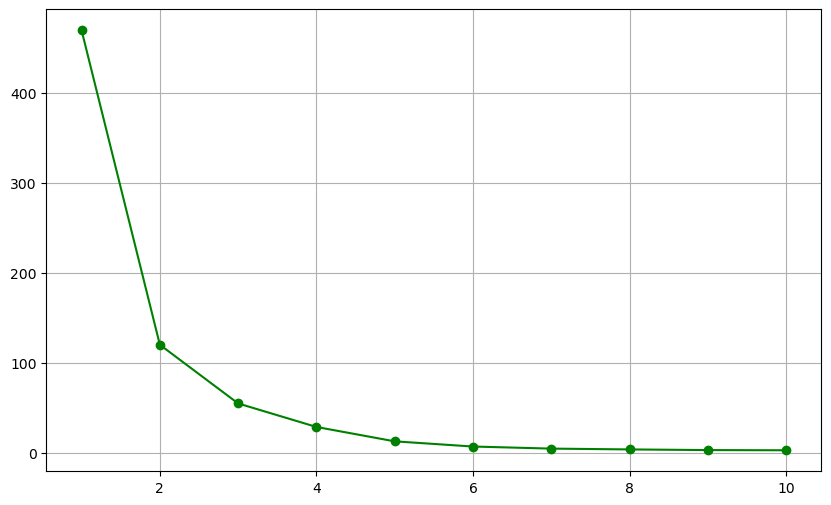

In [138]:
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', random_state=42)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11),clustering_score, marker='o',c = 'green')
plt.grid(True)
plt.show()

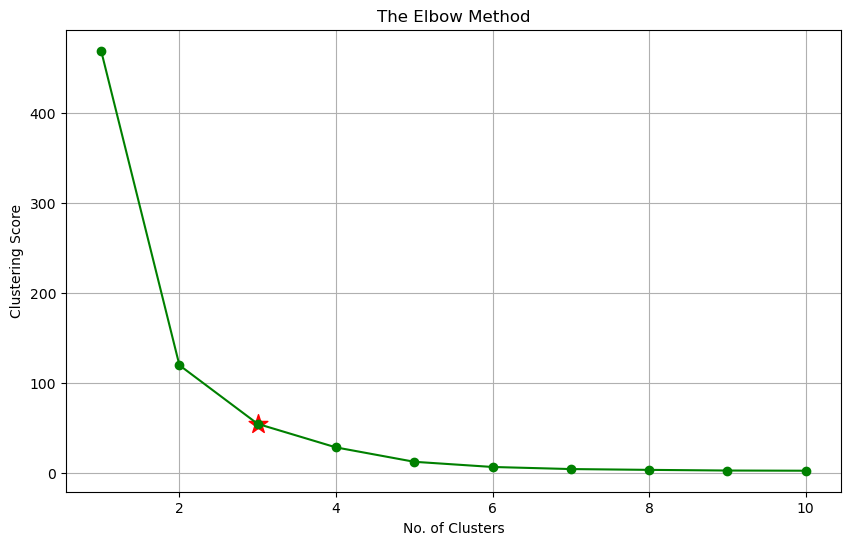

In [140]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score, marker='o', c = 'green')
plt.scatter(3,clustering_score[2],s=200, c='red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.grid(True)
plt.show()

In [108]:
# Set n_clusters based on elbow result 
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

pred = kmeans.predict(X)
pred

array([0, 2, 1, 1, 2, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 1,
       0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 0, 2, 2, 2, 1, 0, 2, 2,
       0, 0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 1, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0,
       2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 1, 1, 1, 2, 0,
       1, 2, 1, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 2, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0])

In [110]:
df['Cluster'] = pred
print('Number of data points in each cluster= \n', df['Cluster'].value_counts())


Number of data points in each cluster= 
 Cluster
0    112
1     56
2     31
Name: count, dtype: int64


Text(0.5, 1.0, 'Traffic Clusters')

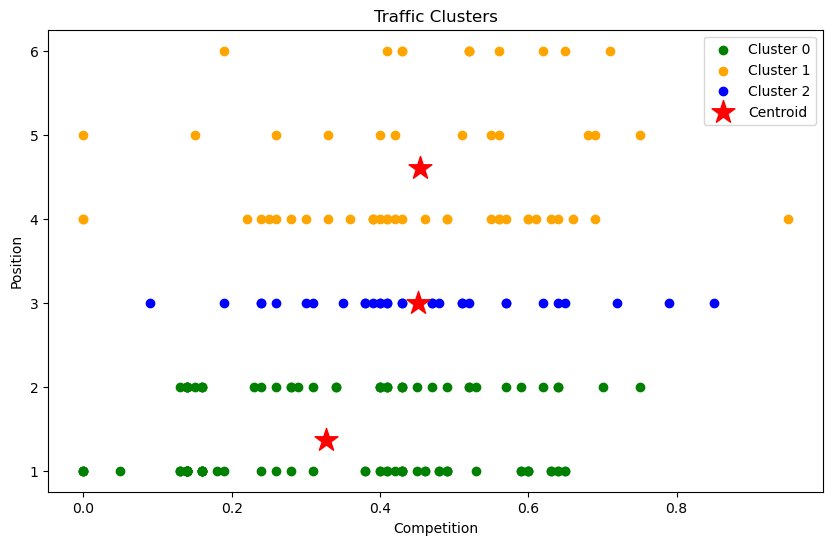

In [120]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'green', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'orange', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')

plt.xlabel('Competition')
plt.ylabel('Position')
plt.legend()
plt.title('Traffic Clusters')